In [269]:
""" You must rename the folder containing the csv's to \'data\' """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [5]:
wellness = pd.read_csv(filepath_or_buffer='./data/wellness.csv')
gps = pd.read_csv(filepath_or_buffer='./data/gps.csv')
games = pd.read_csv(filepath_or_buffer='./data/games.csv')
rpe = pd.read_csv(filepath_or_buffer='./data/rpe.csv')

In [6]:
wellness.Date = pd.to_datetime(wellness.Date, format="%Y-%m-%d")

In [7]:
date_wellness = wellness.set_index(['Date','PlayerID'])
date_wellness.head(5)

Fatigue  Soreness  Desire  Irritability   BedTime  \
Date       PlayerID                                                      
2018-07-21 1               3         3       2             3  23:00:00   
           2               4         3       4             4  23:00:00   
           3               3         3       5             4  22:30:00   
           4               2         3       5             4  00:30:00   
           5               5         3       4             4  23:45:00   

                     WakeTime  SleepHours  SleepQuality  MonitoringScore Pain  \
Date       PlayerID                                                             
2018-07-21 1         07:00:00        8.00             2               13   No   
           2         07:00:00        8.00             4               19  Yes   
           3         06:30:00        8.00             4               19   No   
           4         07:00:00        6.50             1               15   No   
           5         07:00:00        7.25             4               20   No   

                    Illness Menstruation  Nutrition NutritionAdjustment  \
Date       PlayerID                                                       
2018-07-21 1             No          Yes  Excellent                 Yes   
           2             No          Yes        NaN                 NaN   
           3             No           No        NaN                 NaN   
           4             No          Yes  Excellent                 Yes   
           5             No           No       Okay                 Yes   

                    USGMeasurement    USG TrainingReadiness  
Date       PlayerID                                          
2018-07-21 1                    No    NaN                0%  
           2                   Yes  1.010                0%  
           3                   Yes  1.016              100%  
           4                   Yes  1.025               95%  
           5                   Yes  1.022              100%

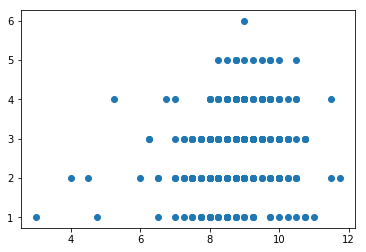

In [8]:
player_wellness = date_wellness.swaplevel().sort_index()
plt.scatter(player_wellness.loc[1].SleepHours.values, player_wellness.loc[1].Fatigue.values)


In [14]:
summation = 0
for item in gps.groupby('GameID').PlayerID.unique():
    summation += len(item)
    
print(summation)

448


In [15]:
max([len(groups) for groups in gps.groupby('GameID').groups.values()])

189107

In [467]:
def aveg(input_list, across=10):
    length = len(input_list)
    start = 0
    storage = np.zeros( math.ceil(length/across) )
    index = 0
    while (start + across -1) < length:
        storage[index] = np.mean(input_list[start:(start+across)])
        start += across
        index += 1
    if (not storage[-1]) and (start < length):
        storage[-1] = np.mean(input_list[start:])
    return storage

def run_tsne_mat(dim_red = 10):
    col_dim = max([ math.ceil( len(groups)/dim_red ) for groups in gps.groupby('GameID').groups.values()])
    tsne_mat = np.zeros((448,col_dim*6))
    
    i = 0
    j = 0
    for group in gps.groupby('GameID').groups.values():
        for player in gps.loc[group].groupby('PlayerID').groups.values():

            AccelX_raw = np.array(gps.loc[player].AccelX)
            AccelY_raw = np.array(gps.loc[player].AccelY)
            AccelZ_raw = np.array(gps.loc[player].AccelZ)
            AccelLoad_raw = np.array(gps.loc[player].AccelZ)
            Speed_raw = np.array(gps.loc[player].Speed)
            Impulse_raw = np.array(gps.loc[player].AccelImpulse)

            AccelX = aveg(AccelX_raw,dim_red)
            AccelY = aveg(AccelY_raw,dim_red)
            AccelZ = aveg(AccelZ_raw,dim_red)
            AccelLoad = aveg(AccelLoad_raw,dim_red)
            Speed = aveg(Speed_raw,dim_red)
            Impulse = aveg(Impulse_raw, dim_red)

            for x in AccelX:
                tsne_mat[i,j] 
                j+=1
            j = col_dim
            for y in AccelY:
                tsne_mat[i,j] = y
                j+=1
            j = col_dim*2
            for z in AccelZ:
                tsne_mat[i,j] = z
                j+=1
            j = col_dim*3
            for load in AccelLoad:
                tsne_mat[i,j] = load
                j+=1
            j = col_dim*4
            for speed in Speed:
                tsne_mat[i,j] = speed
                j+=1
            j = col_dim*5
            for impul in Impulse:
                tsne_mat[i,j] = impul
                j+=1
            i+=1
            j = 0
    return tsne_mat
    

In [474]:
tsne_mat = run_tsne_mat(5)
print(tsne_mat.shape)

(448, 226932)


Text(0,0.5,'cumulative explained variance')

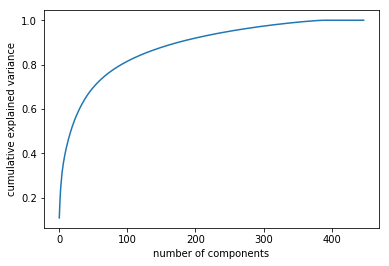

In [475]:
from sklearn.decomposition import PCA
pca = PCA().fit(tsne_mat)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [476]:
pca = PCA(n_components=19)
principalComponents = pca.fit_transform(tsne_mat)

In [488]:
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
scaler.fit(principalComponents)
pc_std = scaler.transform(principalComponents)
embedding = TSNE(n_components=2,perplexity=70,n_iter=600,early_exaggeration=3).fit_transform(principalComponents)
print(embedding.shape)

(448, 2)


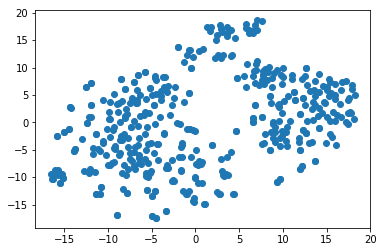

In [489]:
plt.scatter(embedding[:,0],embedding[:,1])

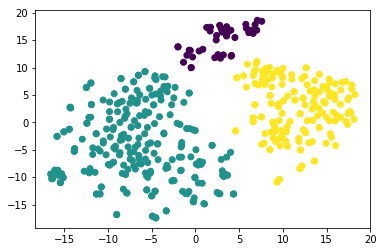

In [495]:
model = SpectralClustering(n_clusters=3,affinity = 'nearest_neighbors')
clu_emb = model.fit_predict(embedding)
plt.scatter(embedding[:,0],embedding[:,1],c=clu_emb)

In [497]:
pd.DataFrame(embedding).to_csv('tsne_3.csv')

In [498]:
with_label = pd.DataFrame(embedding)
with_label['label'] = clu_emb
with_label.to_csv('tsne_lab_1.csv')